# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer

from sklearn import cluster as c
from sklearn import metrics as m

from IPython.display import HTML, Image

from plotly import express as px

## 0.1 Loading Dataset

In [2]:
df_raw = pd.read_csv('D:\\My Drive\\Pessoal\\Projetos\\insiders_clustering\\insiders_clustering\\data\\raw\\Ecommerce.csv', encoding = "ISO-8859-1")
df_raw = df_raw.drop('Unnamed: 8', axis=1)

## 0.2 Helper Functions

# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

## 1.1 Looking Dataset

In [4]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.2 Rename Columns

In [5]:
cols = 'invoice_no stock_code description quantity invoice_date unit_price customer_id country'.split()

df1.columns = cols

## 1.3 Data Dimensions

In [6]:
print(f'Há: {df1.shape[0]} linhas')
print(f'Há: {df1.shape[1]} columnas')

Há: 541909 linhas
Há: 8 columnas


## 1.4 Datatypes

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.5 Check NaN's

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.6 Replace NaN's

In [9]:
temp = df1.shape[0]

df1.dropna(inplace=True)

print(f'Removidos {round((100 * (temp - df1.shape[0]) / temp), 2)}% da base')
print(f'Total atual de linhas {df1.shape[0]}')

Removidos 24.93% da base
Total atual de linhas 406829


## 1.7 Change Datatypes

In [10]:
# 'invoice_date'
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

## 1.8 Descriptive Statistical

# 2.0 Feature Engineering

In [11]:
df2 = df1.copy()

In [12]:
# data reference
df_ref = df2[['customer_id']].drop_duplicates(ignore_index=True)

# gross revenue
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# monetary
temp = df2.groupby('customer_id').agg({'gross_revenue': 'sum'}).reset_index()
df_ref = pd.merge(df_ref, temp, how='left', on='customer_id')

# recency
temp = df2[['customer_id', 'invoice_date']]
temp['invoice_time_delta'] = (df2['invoice_date'].max() - df2['invoice_date']).dt.days
temp = temp.groupby('customer_id').agg({'invoice_time_delta':'min'}).reset_index()
temp.columns = ['customer_id', 'recency_days']
df_ref = pd.merge(df_ref, temp, how='left', on='customer_id')

# frequency
temp = df2[['invoice_no', 'customer_id']].drop_duplicates().groupby('customer_id').agg({'invoice_no':'count'}).reset_index()
temp.columns = ['customer_id', 'frequency']
df_ref = pd.merge(df_ref, temp, on='customer_id', how='left')
df_ref.head()

C:\Users\Samoel\AppData\Local\Temp\ipykernel_6740\3469801785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['invoice_time_delta'] = (df2['invoice_date'].max() - df2['invoice_date']).dt.days


,customer_id,gross_revenue,recency_days,frequency
0,17850.0,5288.63,302,35
1,13047.0,3079.10,31,18
2,12583.0,7187.34,2,18
3,13748.0,948.25,95,5
4,15100.0,635.10,330,6


In [13]:
df2 = df_ref.copy()

# 3.0 Exploratory Data Analysis

In [14]:
df3 = df2.copy()

# 4.0 Data Filtering

In [15]:
df4 = df3.copy()

# 5.0 Data Preparation

In [16]:
df5 = df4.copy()

# 6.0 Feature Selection

In [17]:
df6 = df5.copy()

# 7.0 Hyperparameter Fine-tuning

In [18]:
df7 = df6.copy()

In [19]:
X = df7.drop('customer_id', axis=1)

## 7.1 Within-Cluster Sum of Square (WSS)

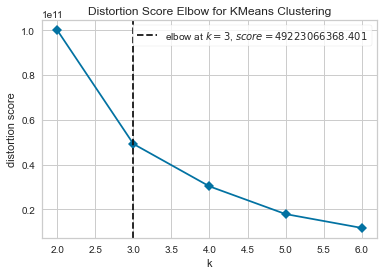

In [20]:
clusters = [2, 3, 4, 5, 6]
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 7.2 Silhouette Score

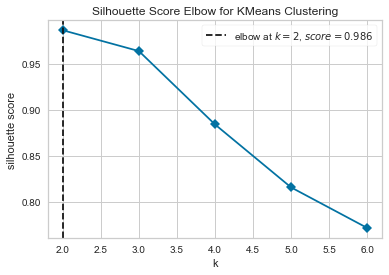

In [21]:
clusters = [2, 3, 4, 5, 6]
kmeans = KElbowVisualizer(c.KMeans(), metric='silhouette', k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

# 8.0 Model Training

In [22]:
df8 = df7.copy()

X = df8.drop('customer_id', axis=1)

## 8.1 K-Means

In [23]:
k = 3

# model definition
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=100)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_
df8['cluster'] = labels

### 8.1.1 Cluster Validation

In [24]:
# WSS (Within-cluster sum of squares)
print(f'WSS value: {kmeans.inertia_}')

# SS (silhouette)
print(f'SS value: {m.silhouette_score(X, labels, metric="euclidean")}')

WSS value: 52830442008.00694
SS value: 0.9494677566681542


# 9.0 Cluster Analysis

In [25]:
df9 = df8.copy()

## 9.1 Visual Inpection

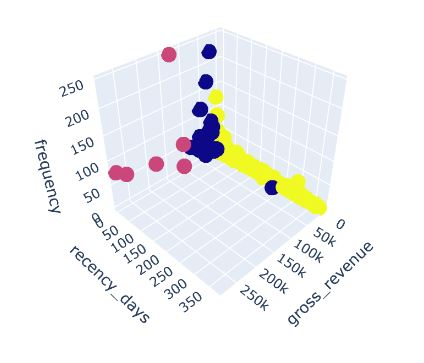

In [26]:
fig = px.scatter_3d(df9, x='gross_revenue', y='recency_days', z='frequency', color='cluster')
# fig.show()
Image('D:\\My Drive\\Pessoal\\Projetos\\insiders_clustering\\insiders_clustering\\img\\3d_plot.jpg')

## 9.2 Cluster Profile

In [52]:
# Number of customers
profile = df9.groupby('cluster').agg({'customer_id':'count'}).reset_index().rename(columns={'customer_id':'number_of_customers'})
# Proportional number of customers
profile['prop_number_of_customers'] = profile['number_of_customers']  / np.sum(profile['number_of_customers'])
# Avg Gross Revenue
temp = df9.groupby('cluster').agg({'gross_revenue': 'mean'}).reset_index().rename(columns={'gross_revenue':'avg_gross_revenue'})
profile['avg_gross_revenue'] = temp['avg_gross_revenue']
# Proportional gross revenue
temp = df9.groupby('cluster').agg({'gross_revenue':'sum'}).reset_index().rename(columns={'gross_revenue':'sum_gross_revenue'})
profile['prop_gross_revenue'] = temp['sum_gross_revenue'] / np.sum(temp['sum_gross_revenue'])
# Avg Recency days
temp = df9.groupby('cluster').agg({'recency_days': 'mean'}).reset_index().rename(columns={'recency_days':'avg_recency_days'})
profile['avg_recency_days'] = temp['avg_recency_days']
# Avg Frequency
temp = df9.groupby('cluster').agg({'frequency': 'mean'}).reset_index().rename(columns={'frequency':'avg_frequency'})
profile['avg_frequency'] = temp['avg_frequency']
profile

,cluster,number_of_customers,prop_number_of_customers,avg_gross_revenue,prop_gross_revenue,avg_recency_days,avg_frequency
0,0,31,0.007091,40543.517742,0.151426,13.290323,53.290323
1,1,6,0.001372,182181.981667,0.131697,7.166667,89.000000
2,2,4335,0.991537,1372.577826,0.716877,92.257901,4.614533


### Cluster 0:
* Número de customers = 31 ( 0,7% da base)
* Contribuição para o faturamento = 15,14%
* Recência média = 13 dias
* Quantidade média de compras = 53
* Gasto total médio = 40543.51 (dolares)

### Cluster 1:
* Número de customers = 6 ( 0,13% da base)
* Contribuição para o faturamento = 13,17%
* Recência média = 7 dias
* Quantidade média de compras = 89
* Gasto total médio = 182181.98 (dolares)

### Cluster 2:
* Número de customers = 4335 ( 99% da base)
* Contribuição para o faturamento = 71,69%
* Recência média = 92 dias
* Quantidade média de compras = 4
* Gasto total médio = 1372.57 (dolares)


# 10.0 Deploy to Production